In [5]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [6]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000,10)<heads_proba).astype(np.int32)
comulative_heads_ratio = np.cumsum(coin_tosses, axis = 0)/np.arange(1,10001).reshape(-1,1)

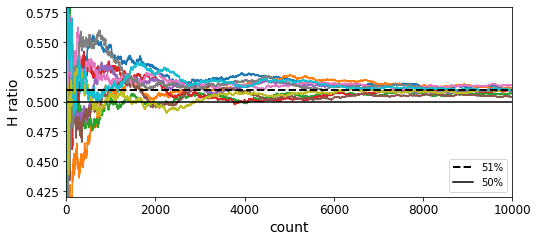

In [8]:
#큰 수의 법칙
plt.figure(figsize=(8,3.5))
plt.plot(comulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51],"k--",linewidth=2,label="51%")
plt.plot([0,10000],[0.5,0.5],"k-",label="50%")
plt.xlabel("count")
plt.ylabel("H ratio")
plt.legend(loc='lower right')
plt.axis([0,10000,0.42,0.58])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='liblinear',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [14]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [17]:
log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10 ,random_state=42)
svm_clf = SVC(gamma="auto",probability=True,random_state=42) #간접투표를 위해 확률을 예측
# 개별 분류기의 예측을 평균 내어 확률이 가장 높은 클래스를 예측
# 확률이 높은 투표에 비중을 더 두기 때문에 직접투표(hard voting)보다 성능이 좋음
voting_clf = VotingClassifier(
estimators=[("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)],voting='soft')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [18]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# 배깅(bootstrap aggregating)
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(random_state=42), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1, random_state=42
)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.904

In [23]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_score(y_pred_tree,y_test)

0.856

In [24]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[-1.5,2.5,-1,1.5],alpha=0.5,contour=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1, x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

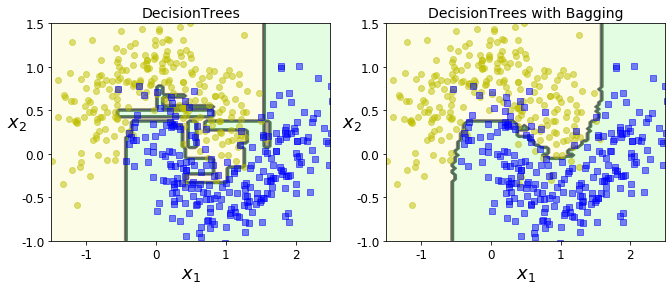

In [27]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf,X,y)
plt.title("DecisionTrees",fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.title("DecisionTrees with Bagging",fontsize=14)
plt.show()

In [28]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random",max_leaf_nodes=16,random_state=42),
n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
#RandomForests: Bagging 이용
# DecisionTreeClassifier: spliter = "best", presort = False
# BaggingClassifier: max_samples = 1.0, best_estimator = DecisionTreeClassifier 
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)
rnd_clf.fit(X_train,y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [32]:
np.sum(y_pred == y_pred_rf)/len(y_pred)

0.976

In [35]:
#특성 중요도
# petal length, petal width 가 중요 특성임을 알 수 있음
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name, score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [37]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

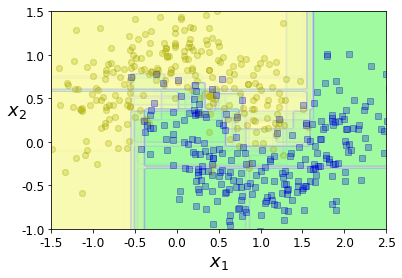

In [40]:
plt.figure(figsize=(6,4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42+i)
    indices_with_replacement = np.random.randint(0,len(X_train),len(X_train))
    tree_clf.fit(X[indices_with_replacement],y[indices_with_replacement])
    plot_decision_boundary(tree_clf,X,y,axes=[-1.5,2.5,-1,1.5],alpha=0.02,contour=False)

plt.show()

In [41]:
#oob(out of bag)를 이용하여 평가
bag_clf = BaggingClassifier(
DecisionTreeClassifier(random_state=42),n_estimators=500,
bootstrap=True, n_jobs=-1,oob_score=True,random_state=42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.8986666666666666

In [42]:
bag_clf.oob_decision_function_

array([[0.32352941, 0.67647059],
       [0.35625   , 0.64375   ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06145251, 0.93854749],
       [0.35465116, 0.64534884],
       [0.01142857, 0.98857143],
       [0.98930481, 0.01069519],
       [0.97409326, 0.02590674],
       [0.7370892 , 0.2629108 ],
       [0.0049505 , 0.9950495 ],
       [0.75      , 0.25      ],
       [0.82681564, 0.17318436],
       [0.98461538, 0.01538462],
       [0.06315789, 0.93684211],
       [0.00490196, 0.99509804],
       [0.99004975, 0.00995025],
       [0.92513369, 0.07486631],
       [1.        , 0.        ],
       [0.03409091, 0.96590909],
       [0.34502924, 0.65497076],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.96319018, 0.03680982],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65420561, 0.34579439],
       [0.

In [43]:
from sklearn.metrics import accuracy_score

y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)
#oob 평가와 test샘플 평가의 점수가 큰 차이가 없다

0.912

In [44]:
#MNIST의 특성중요도
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)

In [46]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"],mnist["target"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation='nearest')
    plt.axis("off")

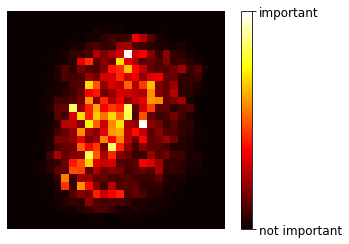

In [49]:
plot_digit(rnd_clf.feature_importances_)

cbar= plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(["not important","important"])
plt.show()

In [58]:
for name, score in zip(mnist["feature_names"],rnd_clf.feature_importances_):
    print(name, score)

pixel1 0.0
pixel2 0.0
pixel3 0.0
pixel4 0.0
pixel5 0.0
pixel6 0.0
pixel7 0.0
pixel8 0.0
pixel9 0.0
pixel10 0.0
pixel11 0.0
pixel12 0.0
pixel13 0.0
pixel14 0.0
pixel15 0.0
pixel16 0.0
pixel17 0.0
pixel18 0.0
pixel19 0.0
pixel20 0.0
pixel21 0.0
pixel22 0.0
pixel23 0.0
pixel24 0.0
pixel25 0.0
pixel26 0.0
pixel27 0.0
pixel28 0.0
pixel29 0.0
pixel30 0.0
pixel31 0.0
pixel32 0.0
pixel33 0.0
pixel34 0.0
pixel35 0.0
pixel36 0.0
pixel37 0.0
pixel38 0.0
pixel39 3.116259684556092e-06
pixel40 1.4966835632515134e-05
pixel41 9.154236552177962e-06
pixel42 0.0
pixel43 3.127644055593785e-06
pixel44 1.8085536573174283e-05
pixel45 1.0034007985965097e-05
pixel46 3.0641636062726584e-06
pixel47 0.0
pixel48 0.0
pixel49 0.0
pixel50 0.0
pixel51 0.0
pixel52 0.0
pixel53 0.0
pixel54 0.0
pixel55 0.0
pixel56 0.0
pixel57 0.0
pixel58 0.0
pixel59 0.0
pixel60 0.0
pixel61 0.0
pixel62 0.0
pixel63 3.0969261660829717e-06
pixel64 1.2286238275256624e-05
pixel65 8.4549322824862e-05
pixel66 9.226161521207416e-06
pixel67 1.21439

In [61]:
# 아다부스트(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
#SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function)
#아다부스트의 다중클래스 버전, 클래스가 2개일때는 아다부스트와 동일
#SAMME.R(Real) : 예측값 대신 클래스 확률에 기반
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1),n_estimators=200,
algorithm="SAMME.R",learning_rate=0.5,random_state=42)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

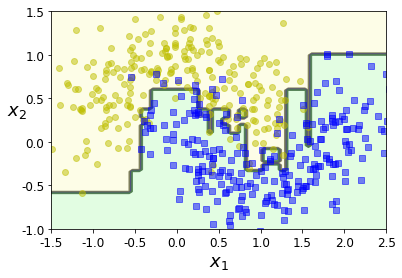

In [62]:
plot_decision_boundary(ada_clf,X,y)

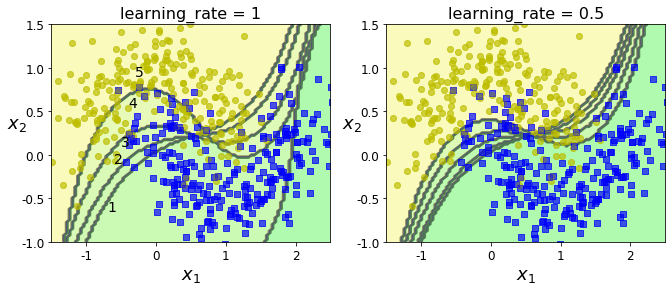

In [65]:
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)        
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma='auto', random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

plt.show()
# 보통 svm은 속도가 느리고 아다부스트를 사용하면 불안정한 경향이 있어 사용하지 않음
# 가중치 2배증가, 1.5배 증가

In [67]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

In [84]:
#그래디언스 부스트(Gradient Boosting)
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [86]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [87]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [88]:
X_new = np.array([[0.8]])

In [89]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [90]:
y_pred

array([0.75026781])

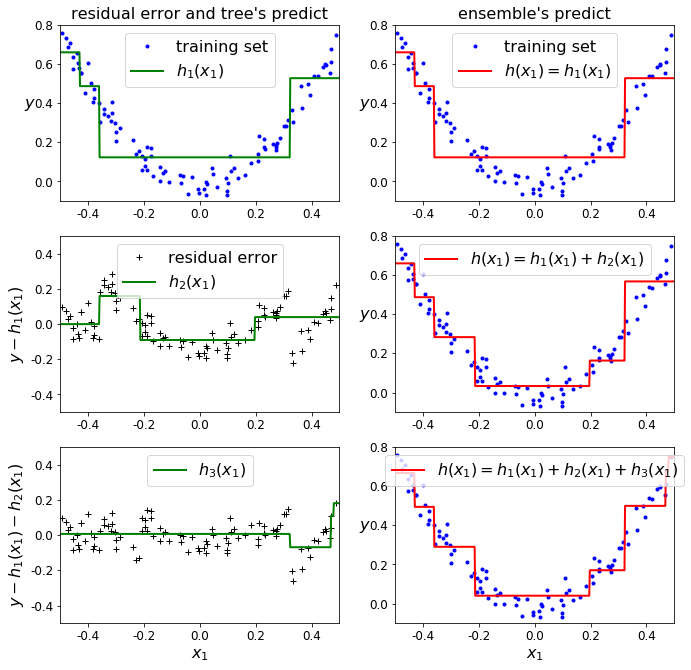

In [92]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("residual error and tree's predict", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("ensemble's predict", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="residual error")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2 ,n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

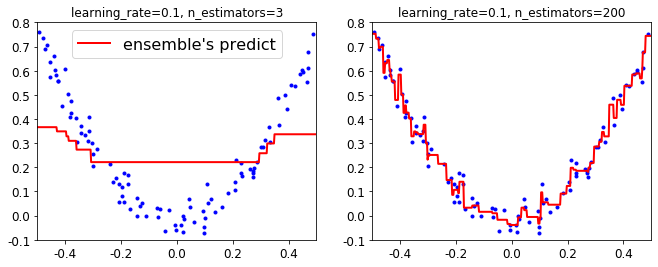

In [99]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt],X,y,axes=[-0.5,0.5,-0.1,0.8],label="ensemble's predict")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate,gbrt.n_estimators))

plt.subplot(122)
plot_predictions([gbrt_slow],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate,gbrt_slow.n_estimators))

plt.show()
#예측기가 너무 적은 경우와 너무 많은 경우

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train,y_train)

# staged_predict() : 훈련의 각 단계에서 앙상블에 의해 만들어진 예측기를 순회하는 반복자(iterator) 반환 
errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [107]:
min_error = np.min(errors)

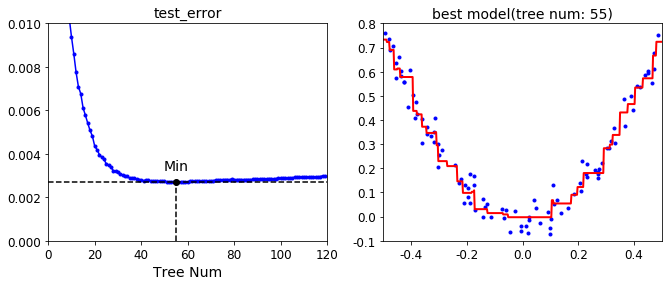

In [109]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(errors,"b.-")
plt.plot([bst_n_estimators, bst_n_estimators],[0,min_error],"k--")
plt.plot([0,120],[min_error, min_error],"k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2,"Min",ha='center',fontsize=14)
plt.axis([0,120,0,0.01])
plt.xlabel("Tree Num")
plt.title("test_error",fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title("best model(tree num: %d)"%bst_n_estimators, fontsize=14)

plt.show()

In [111]:
# warm_start = Tree : fit() 메서드가 호출될 때 기존트리를 유지하고 훈련을 추가함
# cf. 확률적 그래디언스 부스팅 -> subsample : 각 트리가 훈련할 때 사용할 훈련샘플의 비율을 정할 수 있음 -> 편향 증가, 분산 감소, 훈련 속도 증가 
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up+=1
        if error_going_up == 5:
            break

In [112]:
gbrt.n_estimators

61

In [113]:
print("최소검증 MSE:",min_val_error)

최소검증 MSE: 0.002712853325235463


In [123]:
# xgboost : 그래디언트 부스팅 업그레이드 버전, 회귀/분류 둘다 가능
# 아나콘다 프롬프트 conda install -c anaconda py-xgboost -> pip install xgboost
try:
    import xgboost
except ImportError as ex:
    print("에러: xgboost 라이브러리가 설치되지 않았습니다.")
    xgboost = None

In [124]:
if xgboost is not None: 
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("검증 MSE:", val_error)

검증 MSE: 0.00400040950714611


In [125]:
if xgboost is not None: 
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("검증 MSE:", val_error)

[0]	validation_0-rmse:0.22834
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.16224
[2]	validation_0-rmse:0.11843
[3]	validation_0-rmse:0.08760
[4]	validation_0-rmse:0.06848
[5]	validation_0-rmse:0.05709
[6]	validation_0-rmse:0.05297
[7]	validation_0-rmse:0.05129
[8]	validation_0-rmse:0.05155
[9]	validation_0-rmse:0.05211
Stopping. Best iteration:
[7]	validation_0-rmse:0.05129

검증 MSE: 0.0026308690413069744


In [126]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

22.3 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [127]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

36.6 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 연습문제

In [128]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
#MNIST 데이터를 불러들여 훈련 세트, 검증 세트, 테스트 세트로 나눕니다
#(예를 들면 훈련에 40,000개 샘플, 검증에 10,000개 샘플, 테스트에 10,000개 샘플).
X_train_val,X_test,y_train_val,y_test = train_test_split(mnist.data,mnist.target,test_size=10000,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size=10000,random_state=42)

In [134]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [137]:
random_forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)
extra_tree_clf = ExtraTreesClassifier(n_estimators=10,random_state=42)
svm_clf = LinearSVC(max_iter=10000, random_state=42)
mip_clf = MLPClassifier(random_state=42)

In [140]:
estimators = [random_forest_clf, extra_tree_clf, svm_clf, mip_clf]
for estimator in estimators:
    print("훈련 예측기: ",estimator)
    estimator.fit(X_train,y_train)

훈련 예측기:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
훈련 예측기:  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
              

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


훈련 예측기:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [139]:
[estimator.score(X_val,y_val) for estimator in estimators]

[0.9469, 0.9492, 0.8766, 0.9577]

In [141]:
from sklearn.ensemble import VotingClassifier

In [148]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_tree_clf),
    ("svm_clf",svm_clf),
    ("mlp_clf",mip_clf)
]

In [149]:
voting_clf = VotingClassifier(named_estimators)

In [150]:
voting_clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_lea

In [151]:
voting_clf.score(X_val,y_val)

0.9604

In [153]:
[estimator.score(X_val,y_val) for estimator in voting_clf.estimators_]

[0.0, 0.0, 0.0, 0.0]

In [154]:
#SVM없이 성능 테스트
voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_lea

In [155]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10,
                         n_jobs=None, oob_score=False, random_state=42, verbose=0,
                         warm_start=False)),
 ('extra_trees_clf',
  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fractio

In [156]:
voting_clf.estimators_
# 예측기 모델은 svm=None가 업데이트 되었지만, 훈련된 예측기 모델은 X
# VotingClassifier를 다시 훈련시키거나 그냥 훈련된 예측기 목록에서 SVM을 제거

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                 

In [158]:
del voting_clf.estimators_[2]

In [159]:
voting_clf.score(X_val,y_val)
#SVM을 제거하니 성능이 더 좋아짐

0.963

In [160]:
#간접 투표 분류기로 분류
voting_clf.voting="soft"

In [161]:
voting_clf.score(X_val,y_val)

0.966

In [162]:
voting_clf.score(X_test,y_test)

0.9683

In [163]:
[estimator.score(X_test,y_test) for estimator in voting_clf.estimators_]

[0.0, 0.0, 0.0]

# 스태킹(Stacking Ensemble)

In [166]:
X_val_predictions = np.empty((len(X_val),len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:,index] = estimator.predict(X_val)

In [169]:
X_val_predictions

array([[5., 5., 5., 5.],
       [8., 8., 8., 8.],
       [2., 2., 2., 2.],
       ...,
       [7., 7., 7., 7.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]], dtype=float32)

In [170]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200,oob_score=True,random_state=42)
rnd_forest_blender.fit(X_val_predictions,y_val)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [171]:
rnd_forest_blender.oob_score_

0.9605

In [175]:
X_test_predictions = np.empty((len(X_test),len(estimators)),dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:,index] = estimator.predict(X_test)

In [176]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [177]:
accuracy_score(y_pred,y_test)
#이 스태킹 앙상블은 앞서 만든 간접 투표 분류기만큼 성능을 내지는 못합니다.
#하지만 개개의 분류기보다는 당연히 좋습니다.

0.9611